<a href="https://colab.research.google.com/github/saffarizadeh/BUAN4061/blob/main/Using_Public_Datasets_Flow_from_Directory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *BUAN 4061: Advanced Business Analytics*

# **Flow from Directory**

Instructor: Dr. Kambiz Saffarizadeh

---

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Data

## Download the Dataset

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

## Unzip the Dataset

In [4]:
import os
import zipfile

zip_ref = zipfile.ZipFile('rps.zip', 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile('rps-test-set.zip', 'r')
zip_ref.extractall()
zip_ref.close()

## Augment the Dataset

* Rotate each image randomly -40 to 40 degrees
* Shift each image 0% to 20% vertically or horizontally
* Shear each image by up to 20%
* Zoom each image by up to 20%
* Randomly flip each image horizontally or vertically
* Fill in any missing pixels after a shift or shear with nearest neighbors

In [5]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [6]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

## Flow from Directroy

In [7]:
train_generator = training_datagen.flow_from_directory(
	'rps/',
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
	'rps-test-set/',
	target_size=(150,150),
	class_mode='categorical'
)

Found 372 images belonging to 3 classes.


# Model

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3)
])

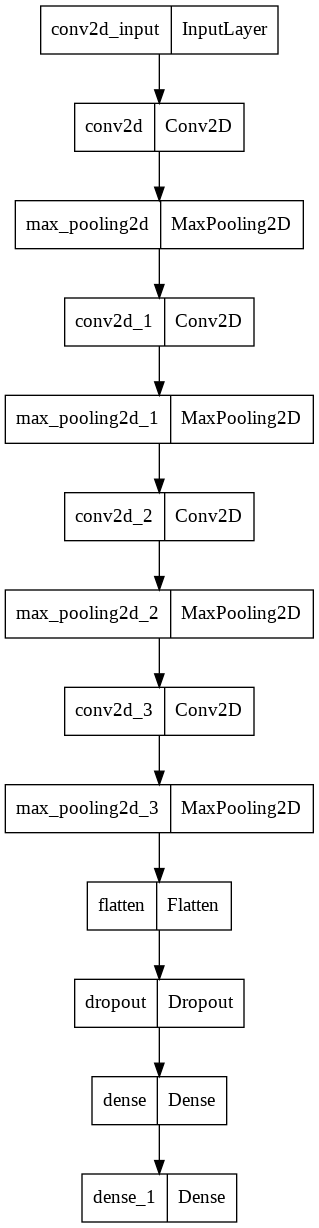

In [10]:
tf.keras.utils.plot_model(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**Making sense of the number parameters in `conv2D` layers**

To understand the number of parameters you can think about how many coefficients you need to calculate for each layer.

For example in the first `Conv2D` layer we need to calculate the coefficients for 64 filters. Each filter has a 3x3 kernel. Since the image is RGB colored, each filter requires 3 sets of 3x3 coefficients (one set per color channel, i.e., R, G, and B). So for each filter we need to calculate 3x3x3 = 27 coefficients. We also need an intercept (aka bias) term for each filter. So in total we need 3x3x3 + 1 = 28 coefficients per filter. We have 64 filters in this layer so in total we have 64x(3x3x3 + 1) = 1792 coefficients to calculate.

The general formula for caluclating the number of parameters in a `conv2D` layer is k(nml+1), where k is the number of filters, n and m are the dimensions of the kernel, and l is the number of channels. Therefore, for instance, for the second `conv2D` layer the number of parameters is calculated as 128x(3x3x64+1)=73856. Please note that for this layer we have 64 channels as the previous `conv2D` layer converted the 3 channels to 64 channels.

In [12]:
# alternatively we can use the 'rmsprop' optimzier instead of 'adam'
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Epoch 1/25
79/79 [==============================] - 29s 258ms/step - loss: 1.0511 - accuracy: 0.4325 - val_loss: 0.5619 - val_accuracy: 0.8145
Epoch 2/25
79/79 [==============================] - 20s 253ms/step - loss: 0.6637 - accuracy: 0.7151 - val_loss: 0.3778 - val_accuracy: 0.8710
Epoch 3/25
79/79 [==============================] - 22s 283ms/step - loss: 0.4337 - accuracy: 0.8242 - val_loss: 0.1929 - val_accuracy: 0.9247
Epoch 4/25
79/79 [==============================] - 21s 268ms/step - loss: 0.2854 - accuracy: 0.8940 - val_loss: 0.2240 - val_accuracy: 0.8925
Epoch 5/25
79/79 [==============================] - 20s 254ms/step - loss: 0.2144 - accuracy: 0.9190 - val_loss: 0.1636 - val_accuracy: 0.9409
Epoch 6/25
79/79 [==============================] - 21s 264ms/step - loss: 0.1477 - accuracy: 0.9437 - val_loss: 0.1093 - val_accuracy: 0.9677
Epoch 7/25
79/79 [==============================] - 21s 263ms/step - loss: 0.1554 - accuracy: 0.9433 - val_loss: 0.1000 - val_accuracy: 0.9704

## Add Softmax

In [14]:
prob_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

## Save the Trained Model

In [ ]:
prob_model.save("rps.h5")

# Prediction

You can load the saved model (if you want) and use it.

In [ ]:
loaded_model = tf.keras.models.load_model('rps.h5')

Upload one or more images.

In [17]:
uploaded = files.upload()

Saving sc.jpeg to sc.jpeg


Load images as numpy arrays.

In [18]:
images = []

for file_path in uploaded.keys():
  img = image.load_img(file_path, target_size=(150, 150))
  x = image.img_to_array(img)
  images.append(x)

images = np.array(images)

In [19]:
classes = loaded_model.predict(images, batch_size=10)
print(classes)

[[0. 1. 0.]]
